<IPython.core.display.Javascript object>


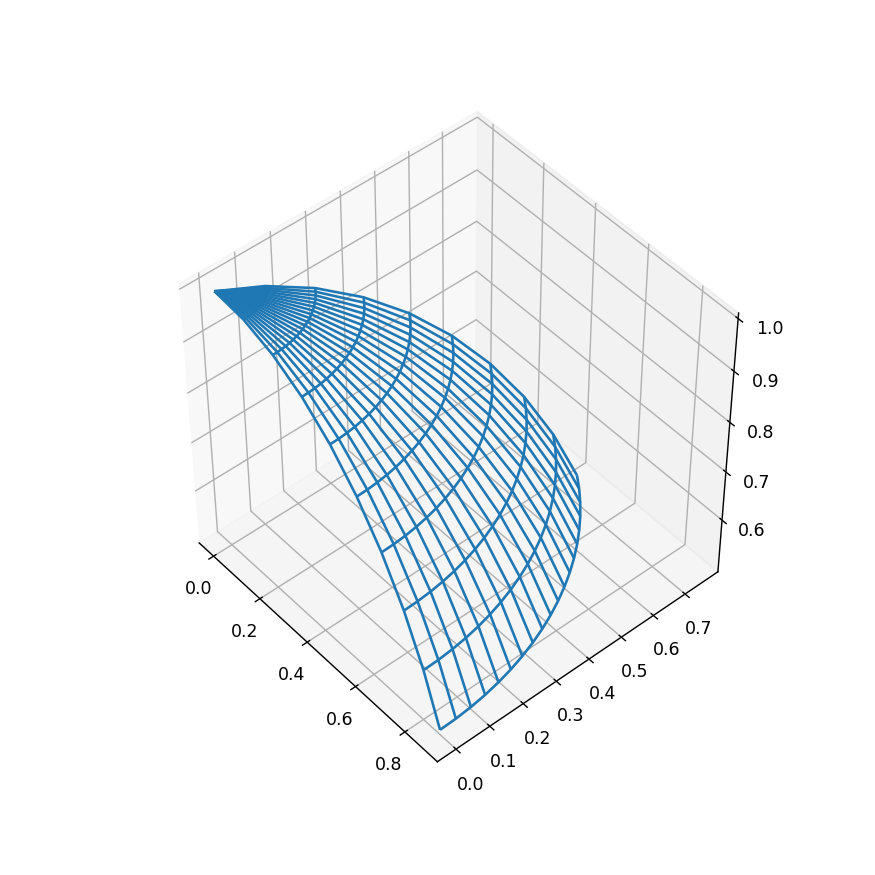

In [32]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

sin = np.sin
cos = np.cos
pi  = np.pi
arr = np.array


x0 = 0
y0 = 0
z0 = 0
r  = 1

u, v = np.mgrid[0:1/6*2*np.pi:20j, 0:1/3*np.pi:10j]
x = r * np.cos(u) * np.sin(v)
y = r * np.sin(u) * np.sin(v)
z = r * np.cos(v)
x = x + x0
y = y + y0
z = z + z0

fig = plt.figure (figsize=(7, 7))
ax  = fig.gca (projection='3d')

ax.plot_wireframe(x, y, z)
plt.show()


<IPython.core.display.Javascript object>


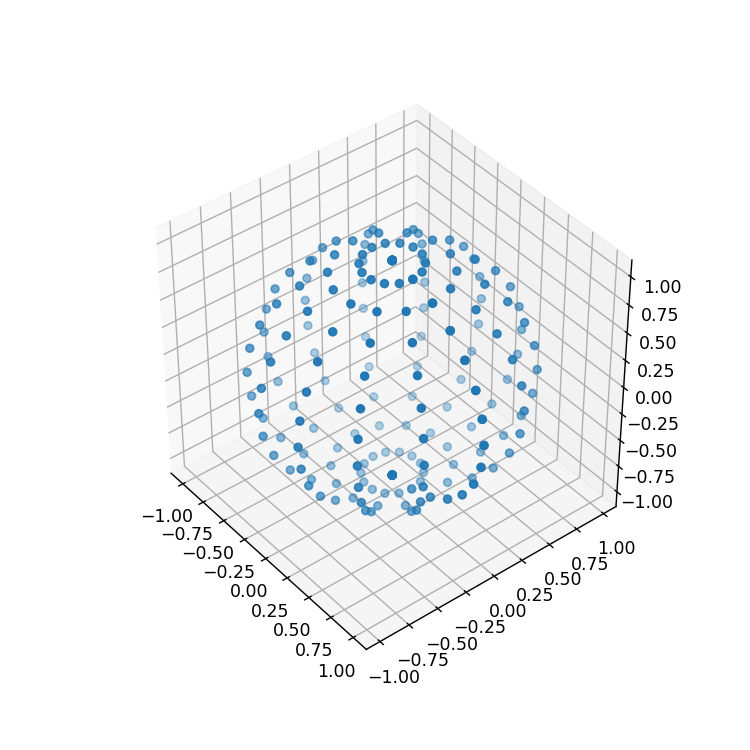

In [34]:
n = 15

a = np.linspace(0, 1*2*pi, n)
b = np.linspace(0, 1*pi, n)
r = 1

x0 = 0
y0 = 0
z0 = 0

x = np.zeros(n**2)
y = np.zeros(n**2)
z = np.zeros(n**2)

for i in range(a.size):
    for j in range(b.size):
        x[i*n+j] = x0 + r * np.cos(a[i]) * np.sin(b[j])
        y[i*n+j] = y0 + r * np.sin(a[i]) * np.sin(b[j])
        z[i*n+j] = z0 + r *                np.cos(b[j])
        
        
perfect = arr([x, y, z])

fig = plt.figure (figsize=(6, 6))
ax  = fig.gca   (projection='3d')

ax.scatter(x, y, z, marker='o')
plt.show()


In [121]:
def sphere(C=arr([0, 0, 0]), R=1, r1=1, r2=1, n=15):

    a = np.linspace(0, r1 *2 *pi, n)
    b = np.linspace(0, r1    *pi, n)
    
    x = np.zeros(n**2)
    y = np.zeros(n**2)
    z = np.zeros(n**2)

    for i in range(a.size):
        for j in range(b.size):
            x[i*n+j] = C[0] + R * np.cos(a[i]) * np.sin(b[j])
            y[i*n+j] = C[1] + R * np.sin(a[i]) * np.sin(b[j])
            z[i*n+j] = C[2] + R                * np.cos(b[j])
            
    return arr([x, y, z])

def spoil(points, err_size):
    
    rand_err = 2 * np.random.rand(points.shape[0], points.shape[1]) - 1
    spoiled  = points + err_size * rand_err   
    return spoiled

def plot_points(points, mark=None):
    fig = plt.figure (figsize=(7, 7))
    ax  = fig.gca   (projection='3d')

    ax.scatter(points[0], points[1], points[2], marker=mark)

In [122]:
def plot_sph(points, R=1, C=arr([0, 0, 0]), alpha=0.3):
    phi = np.linspace(0, np.pi, 100)
    theta = np.linspace(0, 2*np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)

    # The Cartesian coordinates of the unit sphere
    x = C[0] + R * np.sin(phi) * np.cos(theta)
    y = C[1] + R * np.sin(phi) * np.sin(theta)
    z = C[2] + R * np.cos(phi)

    
    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[0], points[1], points[2], color='g')
    ax.plot_surface(x, y, z, alpha=0.3)


In [123]:
#	fit a sphere to X,Y, and Z data points
#	returns the radius and center points of
#	the best fit sphere
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = np.sqrt(t)

    return radius, C[0], C[1], C[2]

[0.81494336] [0.04308798 0.09263327 0.20762897]


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<IPython.core.display.Javascript object>


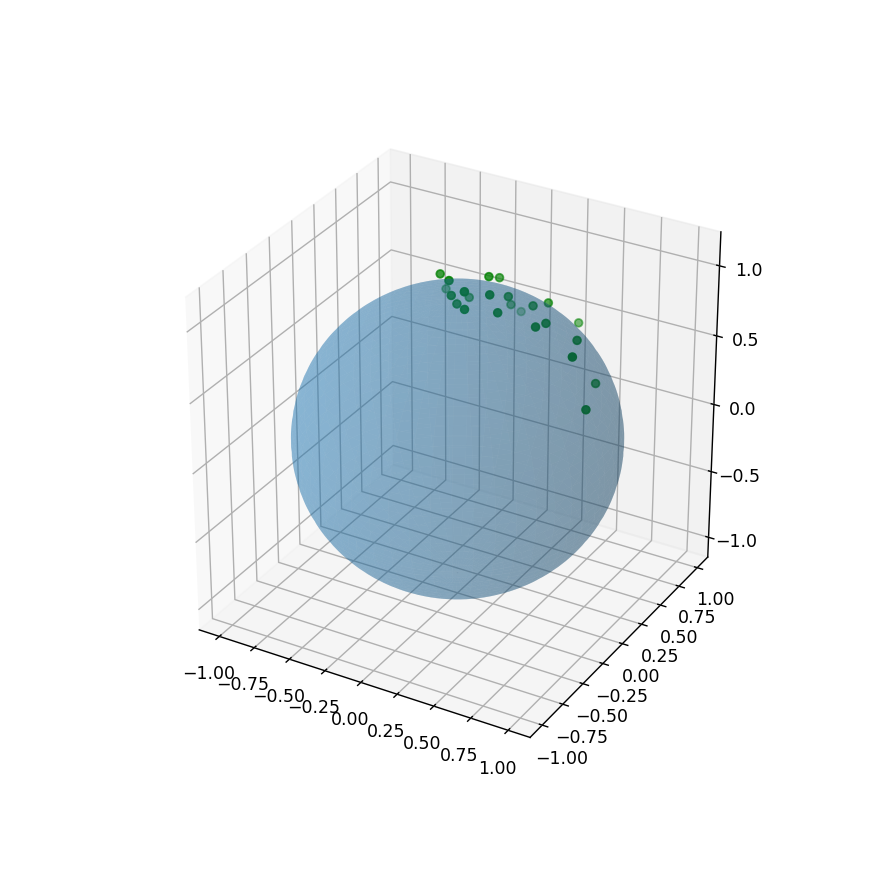

<IPython.core.display.Javascript object>


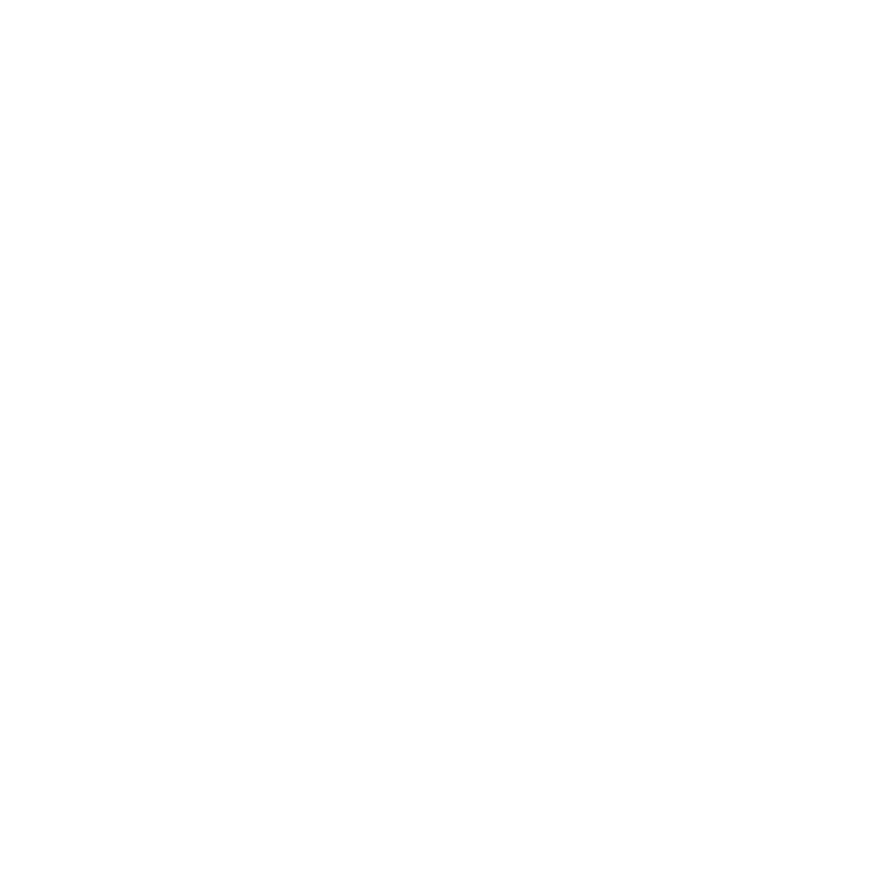

In [134]:
perfect = sphere(n=5, r1=1/3, r2=1/4)

err = 1/10
spoiled = spoil(perfect, err)


C = np.zeros(3)

radius, C[0], C[1], C[2] = sphereFit(spoiled[0], spoiled[1], spoiled[2])

print (radius, C)

plot_sph(points=spoiled)
fig = plt.figure(figsize=(7, 7))
plt.show()